## downloading the data set

In [21]:
# note: i'll fix this later i was having issues w the dataloader and kaggle file so i just directly uploaded them here
from google.colab import drive
import os
import shutil

# files.upload()

# #mount to drive
drive.mount('/content/drive', force_remount=True)
# setting up paths
path_to_project_files = '/content/drive/MyDrive/dl2025spr/DeepLearning/'
existing = os.path.join(path_to_project_files, 'kaggle.json')
path_to_colab_utils = '/root/.kaggle'
target = os.path.join(path_to_colab_utils, 'kaggle.json')



Mounted at /content/drive


In [22]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d xhlulu/leafsnap-dataset
!unzip leafsnap-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-03-2.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-03-3.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-03-4.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-04-1.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-04-2.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-04-3.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-04-4.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-05-1.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-05-2.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-05-3.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-05-4.png  
  inflating: l

# Set up the data loader

creating the dataset and dataloader

In [3]:
# # # it wasnt working so im manually uploading it
# from google.colab import files
# files.upload()

Saving dataloader.py to dataloader (1).py


{'dataloader (1).py': b'# import os\r\n# import numpy as np\r\n# from PIL import Image\r\n# from torch.utils.data import Dataset\r\n\r\n\r\n# class LeafsnapDataset(Dataset):\r\n#     def __init__(self, image_path, root_folder, use_segmented=False, source="both", expand_lab=False, transform=None, lab_transform=None):\r\n#         self.root_directory = root_folder\r\n#         self.transform = transform\r\n#         self.lab_transform = lab_transform\r\n\r\n#         self.data = []\r\n#         with open(image_path, \'r\') as f:\r\n#             col_names = f.readline().strip().split(\'\\t\')\r\n\r\n#             for line in f:\r\n#                 row = line.strip().split(\'\\t\')\r\n#                 self.data.append(row)\r\n\r\n#                 if ((expand_lab == True) and (row[col_names.index(\'source\')] == "lab")):\r\n#                     image_path = row[col_names.index(\'image_path\')]\r\n#                     image_path_split = image_path.split(".")\r\n#                     se

imports

In [23]:
from dataloader import *

import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
# from dataloader import LeafsnapDataset

# additional imports for the SWIN transformer
import torch.nn as nn
import timm # has the pre-trained swim models

define image transformations

In [24]:
# transformer
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# building data loader

inialize the data set

In [6]:
# # it wasnt working so im manually uploading it
# leaf snap dataset
# from google.colab import files
# files.upload()

Saving leafsnap-dataset-images.txt to leafsnap-dataset-images (2).txt


{'leafsnap-dataset-images (2).txt': b'file_id\timage_path\tsegmented_path\tspecies\tsource\n55497\tdataset/images/lab/abies_concolor/ny1157-01-1.jpg\tdataset/segmented/lab/abies_concolor/ny1157-01-1.png\tAbies concolor\tlab\n55498\tdataset/images/lab/abies_concolor/ny1157-01-2.jpg\tdataset/segmented/lab/abies_concolor/ny1157-01-2.png\tAbies concolor\tlab\n55499\tdataset/images/lab/abies_concolor/ny1157-01-3.jpg\tdataset/segmented/lab/abies_concolor/ny1157-01-3.png\tAbies concolor\tlab\n55500\tdataset/images/lab/abies_concolor/ny1157-01-4.jpg\tdataset/segmented/lab/abies_concolor/ny1157-01-4.png\tAbies concolor\tlab\n55501\tdataset/images/lab/abies_concolor/ny1157-02-1.jpg\tdataset/segmented/lab/abies_concolor/ny1157-02-1.png\tAbies concolor\tlab\n55502\tdataset/images/lab/abies_concolor/ny1157-02-2.jpg\tdataset/segmented/lab/abies_concolor/ny1157-02-2.png\tAbies concolor\tlab\n55503\tdataset/images/lab/abies_concolor/ny1157-02-3.jpg\tdataset/segmented/lab/abies_concolor/ny1157-02-3.png

In [25]:
root_directory = "/content/leafsnap-dataset/"
image_paths_file = root_directory + "leafsnap-dataset-images.txt"

dataset = LeafsnapDataset(image_paths_file, root_directory, use_segmented=False, transform=transform)

build the dataloader

In [26]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)

verifying that the dataloader is workin [debugging to see what it shows]


In [27]:
data_iter = iter(dataloader)
images, labels = next(data_iter)
print(f"Batch size: {images.shape}, Labels: {labels}")

Batch size: torch.Size([32, 3, 224, 224]), Labels: tensor([115, 167, 147,   4,  69,  37,  23,  81,  63,  12,  87,  61, 106,  91,
         51,   8, 108,  39,  97, 161, 117, 160,  71, 102,  15,   6, 168, 175,
         72,  87,  24, 158])


Leadsnap Dataset modification (80/20 split)


In [28]:
class LeafsnapDataset(Dataset):
  def init__(self, image_path, root_folder, image_list_file, ise_segmented=False, transform=None):
    self.root_directory = root_folder
    self.transform = transform

    # reading the list of image paths from the file in git
    with open(os.path.join(root_folder, image_list_file), 'r') as f:
      image_paths = f.read().splitlines()

    # getting the main image info from the csv file
    self.image_info = pd.read_csv(image_path, sep='\t')
    # we then filter the image_info to inlcude only paths from the file
    self.image_info = self.image_info[self.image_info['image_path'].isin(image_paths)]
    self.image_info = self.image_info.reset_index(drop=True)

    # label mapping
    label_hashmap = {}
    species_set = set(sorted(self.image_info['species'].unique()))

    for i, species in enumerate(species_set):
      label_hashmap[species] = i

    # convert the species in to numeric labels
    self.labels = [label_hashmap[species] for species in self.image_info['species']]
    # determine which image path column to use
    self.img_path_col = 'segmented_path' if use_segmented else 'image_path'

  def _len_(self):
    return len(self.image_info)

  def _getitem_(self, idx):
    # constructing the full image path
    img_name = os.path.join(self.root_directory, self.image_info.loc[idx, self_img_path_col])

    # open and transform image
    image = Image.open(img_name).convert('RGB')
    if self.transform:
      image - self.transform(image)
    return image, self.labels[idx]



## Vision Transformer (ViT) implementation


install needed libraries

In [11]:
!pip install torch torchvision timm

load pre-trained ViT model

In [29]:
import timm
import torch.nn as nn
## defining the vision transformer
class ViTLeafClassifier(nn.Module):
    def __init__(self, num_classes=185):
        super(ViTLeafClassifier, self).__init__()

        # vision transformer used
        # self.vit = timm.create_model('vit_base_patch16_224', pretrained=True)  # Load ViT with pre-trained weights
        # self.vit.head = nn.Linear(self.vit.head.in_features, num_classes)  # Modify classifier for 185 leaf classes

        # updated: to make it a swin model instead of vision transformer
        self.vit = timm.create_model("swin_tiny_patch4_window7_224", pretrained=True, num_classes=185)

    def forward(self, x):
        return self.vit(x)

# Train the model

this is just a sanity check to see if its working like needed - takes a batch from dataloader > undoes the imageNet normalization - plots 4 random images

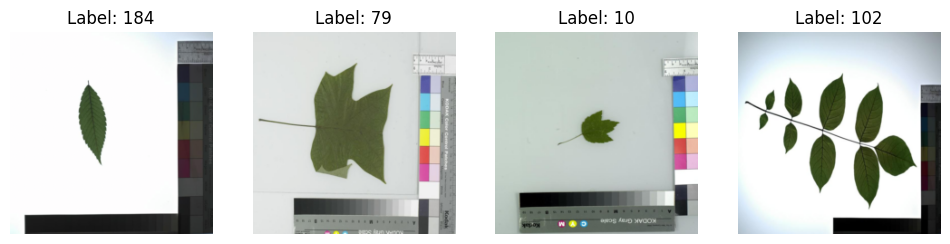

In [30]:
import matplotlib.pyplot as plt

# Get one batch from the train dataloader
data_iter = iter(dataloader)
images, labels = next(data_iter)

num_images_to_show = 4
# Plot a few sample images with their labels
plt.figure(figsize=(12, 6))
for idx in range(num_images_to_show):
    img = images[idx].cpu()
    img = img * torch.tensor([0.229, 0.224, 0.225]).view(3,1,1) + torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)  # Undo normalization
    img = img.permute(1, 2, 0).numpy()  # (C, H, W) --> (H, W, C)
    img = img.clip(0, 1)

    plt.subplot(1, num_images_to_show, idx+1)
    plt.imshow(img)
    plt.title(f"Label: {labels[idx].item()}")
    plt.axis('off')

plt.show()


In [31]:
# i have trained it like 3 times already and it randomly crashes or my laptop does, i will finish training in a bit and push again ik colab hates me rn

# training loop
# Define the device
import torch
from tqdm import tqdm # for the bar

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Initialize model, loss function, and optimizer
model = ViTLeafClassifier(num_classes=185).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)

# Training loop
num_epochs = 10
print(f"\n Starting Training on {device}\n")

for epoch in range(num_epochs):
    model.train()

    progress_bar = tqdm(dataloader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch')

    running_loss = 0.0
    correct = 0
    total = 0

    # print(f"\n Epoch {epoch+1}/{num_epochs}")

    for batch_idx, (images, labels) in enumerate(dataloader):
        images, labels = images.to(device), labels.to(device) # move data ti device

        optimizer.zero_grad() # we zero the parameter gradients
        # forward pass
        outputs = model(images)

        # loss = criterion(outputs, labels)
        labels = labels.long()
        loss = criterion(outputs, labels)
        # backward pass
        loss.backward()
        optimizer.step()

        # update the stats
        running_loss += loss.item()

        # track accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        # update the progress bar
        # Print updates every 10 batches
        if (batch_idx + 1) % 10 == 0 or batch_idx == 0:
            print(f"  Batch {batch_idx+1}/{len(dataloader)} | Loss: {loss.item():.4f} | Running Avg Loss: {running_loss / (batch_idx + 1):.4f}")

    # summary
    epoch_loss = running_loss / len(dataloader)
    epoch_acc = 100 * correct / total
    print(f"\n Epoch {epoch+1} Finished - Avg Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.2f}%")

print("\n Training Complete!")


 Starting Training on cuda



Epoch 10/10:   0%|          | 0/965 [35:43<?, ?batch/s]


  Batch 1/965 | Loss: 5.2373 | Running Avg Loss: 5.2373
  Batch 10/965 | Loss: 5.1890 | Running Avg Loss: 5.2312
  Batch 20/965 | Loss: 5.1066 | Running Avg Loss: 5.1811
  Batch 30/965 | Loss: 4.8664 | Running Avg Loss: 5.0762
  Batch 40/965 | Loss: 4.6094 | Running Avg Loss: 4.9394
  Batch 50/965 | Loss: 3.5179 | Running Avg Loss: 4.7448
  Batch 60/965 | Loss: 3.5350 | Running Avg Loss: 4.5804
  Batch 70/965 | Loss: 3.2625 | Running Avg Loss: 4.4224
  Batch 80/965 | Loss: 3.0609 | Running Avg Loss: 4.2548
  Batch 90/965 | Loss: 2.5052 | Running Avg Loss: 4.1022
  Batch 100/965 | Loss: 2.4377 | Running Avg Loss: 3.9539
  Batch 110/965 | Loss: 2.7363 | Running Avg Loss: 3.8217
  Batch 120/965 | Loss: 2.2235 | Running Avg Loss: 3.7007
  Batch 130/965 | Loss: 2.0492 | Running Avg Loss: 3.5969
  Batch 140/965 | Loss: 2.1372 | Running Avg Loss: 3.4954
  Batch 150/965 | Loss: 1.7531 | Running Avg Loss: 3.3862
  Batch 160/965 | Loss: 2.0823 | Running Avg Loss: 3.2887
  Batch 170/965 | Loss: 1


Epoch 1/10:   0%|          | 0/965 [06:37<?, ?batch/s]


  Batch 1/965 | Loss: 0.4327 | Running Avg Loss: 0.4327
  Batch 10/965 | Loss: 0.3464 | Running Avg Loss: 0.4002
  Batch 20/965 | Loss: 0.5815 | Running Avg Loss: 0.4311
  Batch 30/965 | Loss: 0.3236 | Running Avg Loss: 0.4020
  Batch 40/965 | Loss: 0.2269 | Running Avg Loss: 0.4049
  Batch 50/965 | Loss: 0.2422 | Running Avg Loss: 0.3860
  Batch 60/965 | Loss: 0.4244 | Running Avg Loss: 0.4092
  Batch 70/965 | Loss: 0.7431 | Running Avg Loss: 0.4247
  Batch 80/965 | Loss: 0.3824 | Running Avg Loss: 0.4256
  Batch 90/965 | Loss: 0.1643 | Running Avg Loss: 0.4306
  Batch 100/965 | Loss: 0.3934 | Running Avg Loss: 0.4374
  Batch 110/965 | Loss: 0.3331 | Running Avg Loss: 0.4341
  Batch 120/965 | Loss: 0.5800 | Running Avg Loss: 0.4340
  Batch 130/965 | Loss: 0.3221 | Running Avg Loss: 0.4320
  Batch 140/965 | Loss: 0.2706 | Running Avg Loss: 0.4378
  Batch 150/965 | Loss: 0.3955 | Running Avg Loss: 0.4293
  Batch 160/965 | Loss: 0.4095 | Running Avg Loss: 0.4272
  Batch 170/965 | Loss: 0

Epoch 2/10:   0%|          | 0/965 [06:36<?, ?batch/s]


  Batch 1/965 | Loss: 0.3934 | Running Avg Loss: 0.3934
  Batch 10/965 | Loss: 0.3724 | Running Avg Loss: 0.3085
  Batch 20/965 | Loss: 0.1896 | Running Avg Loss: 0.3099
  Batch 30/965 | Loss: 0.4847 | Running Avg Loss: 0.3151
  Batch 40/965 | Loss: 0.2894 | Running Avg Loss: 0.3021
  Batch 50/965 | Loss: 0.1496 | Running Avg Loss: 0.2899
  Batch 60/965 | Loss: 0.0525 | Running Avg Loss: 0.2815
  Batch 70/965 | Loss: 0.2353 | Running Avg Loss: 0.2748


KeyboardInterrupt: 

^ had to end training early because I ran out of tokens on github colab.

# Evaluating the model

In [32]:
# top-1 accuracy, top-5 accuracy, and macro f1
from sklearn.metrics import accuracy_score, f1_score
import torch

model.eval()
all_preds = []
all_labels = []
top5_correct = 0
total_samples = 0

with torch.no_grad():
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        #Top-1 Predictions
        _, top1_preds = torch.max(outputs, 1)
        all_preds.extend(top1_preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Top-5 Accuracy
        top5_preds = torch.topk(outputs, k=5, dim=1).indices  # Get top-5 indices
        top5_correct += torch.sum(top5_preds.eq(labels.view(-1, 1)))  # Count correct top-5
        total_samples += labels.size(0)

#Calculate Metrics
top1_accuracy = accuracy_score(all_labels, all_preds)
top5_accuracy = top5_correct.item() / total_samples
macro_f1 = f1_score(all_labels, all_preds, average='macro')

print(f"Top-1 Accuracy: {top1_accuracy:.4f}") # 60.45
print(f"Top-5 Accuracy: {top5_accuracy:.4f}") # 88.53
print(f"Macro F1 Score: {macro_f1:.4f}") # 59.03


Top-1 Accuracy: 0.9248
Top-5 Accuracy: 0.9966
Macro F1 Score: 0.9257


Result comparison

ViT Results:
$$\text{Top-1 Accuracy}: 0.6045$$
$$\text{Top-5 Accuracy}: 0.8853$$
$$\text{Macro F1 Score}: 0.59.03$$

Swim Transformer:
$$\text{Top-1 Accuracy}: 0.9248$$
$$\text{Top-5 Accuracy}: 0.9966$$
$$\text{Macro F1 Score}: 0.9257$$

These results could be wrong, possibly because of overfitting or model just memorizing. There could also be a test leakage if the there is an overlap between the test and train images.

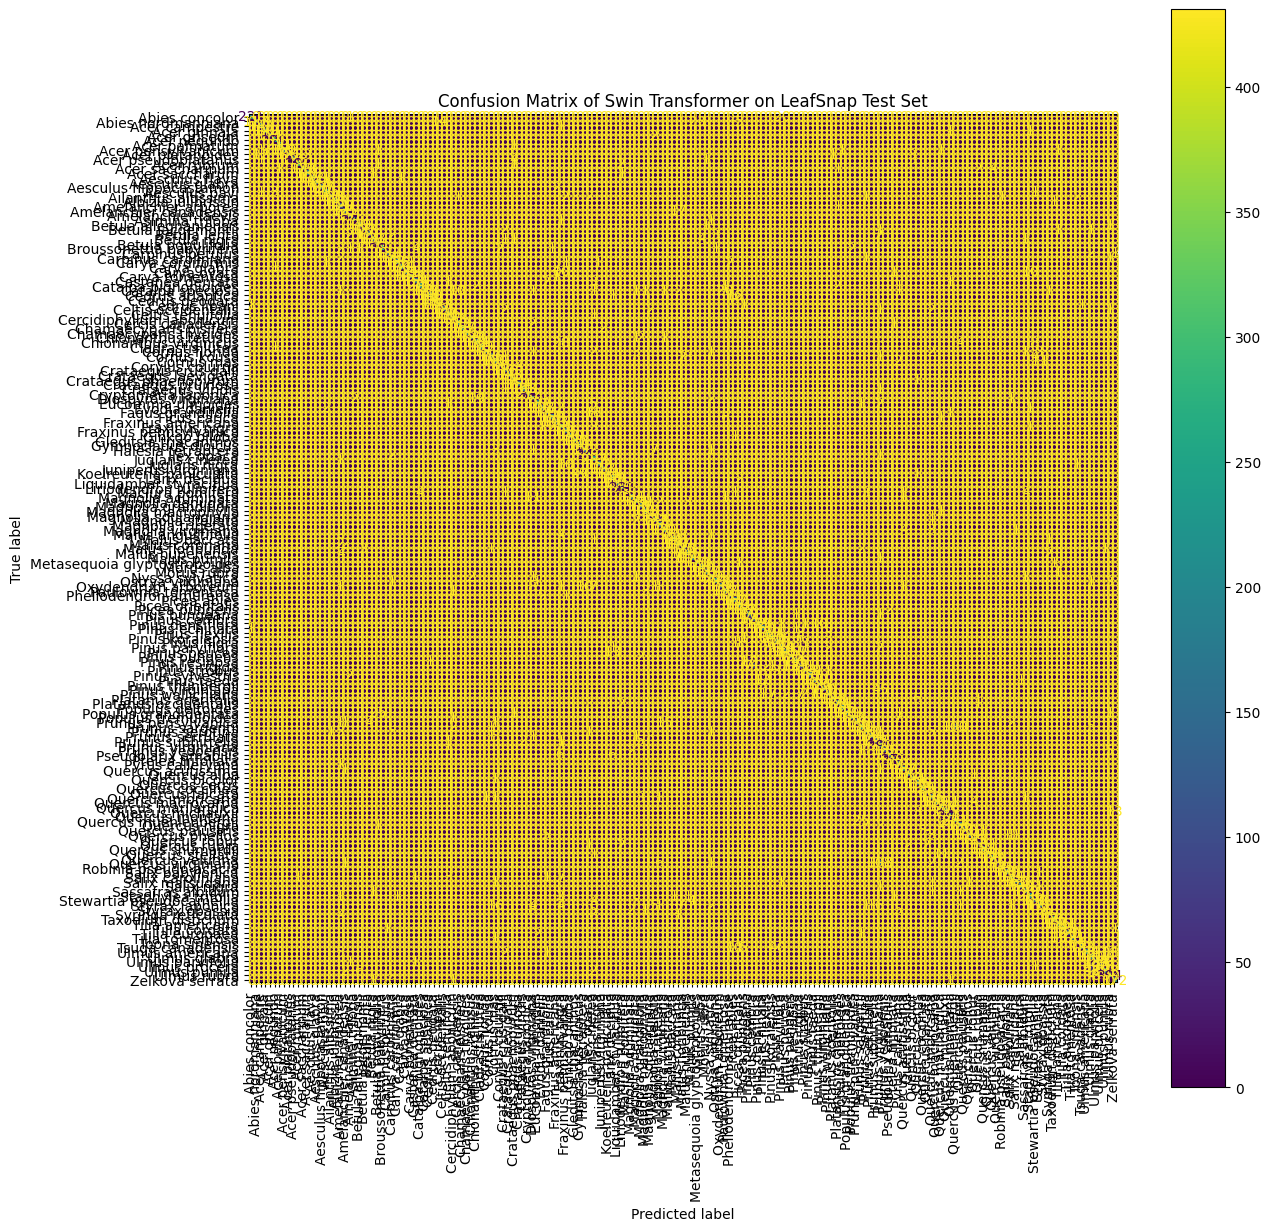

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

image_info = pd.read_csv("/content/leafsnap-dataset/leafsnap-dataset-images.txt", sep='\t')
# create index to species mapping
species_to_idx = {species: i for i, species in enumerate(sorted(image_info['species'].unique()))}
idx_to_species = {v: k for k, v in species_to_idx.items()}  # Create reverse mapping

# confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(idx_to_species.values()))

fig, ax = plt.subplots(figsize=(14, 14))
disp.plot(ax=ax, xticks_rotation='vertical')
plt.title("Confusion Matrix of Swin Transformer on LeafSnap Test Set")
plt.show()


The confusion matrix shows the model's performance across 185 leaf species in the LeafSnap test database. Each row is the true species label and each column shows the model's predicted label. The confusion matrix has a strong diagnoal pattern shwoing that Swin Transformer corrrectly predicted majority of the samples for each species. Therefore, the confusion matrix supports the model's reported high accuracy and macro-F1 score.

saving

In [38]:
torch.save(model.state_dict(), "vit_swin__leafsnap.pth")